# Model training

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model


In [2]:
outdir = "out_p_a1_given_q_xeff"
# import data
data = pd.read_pickle(f"{outdir}/p_a1_given_q_xeff.pkl")

In [3]:
data

,q,xeff,a1,p_a1
0,0.0,-1.0,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,0.0,-0.8,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,0.0,-0.6,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,0.0,-0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0.0,-0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...
116,1.0,0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[1.0680033419862862, 1.0678605941877117, 1.067..."
117,1.0,0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[0.7832345001188603, 0.7843442342552497, 0.784..."
118,1.0,0.6,"[0.2064128256513026, 0.2080031807101176, 0.209...","[0.0003581317510958827, 0.0006423405154926148,..."
119,1.0,0.8,"[0.6112224448897795, 0.6120015582266737, 0.612...","[0.003378646421929789, 0.004692188317429458, 0..."


## Pre-processing

### Some data contains nans, drop them so that they wont cause problems later

In [4]:
data.drop([0,1,2,3,4,5,6,7,8,9,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120], inplace=True)

In [5]:
data.reset_index(drop=True, inplace=True)

Stupid way of getting everything to a numpy array with dtyoe = float64

In [6]:
a1 = []
for i in range(len(data)):
    a1.append(data['a1'][i])
a1 = np.array(a1)
p = []
for i in range(len(data)):
    p.append(data['p_a1'][i])
p = np.array(p)
q = data['q'].values
xeff = data['xeff'].values

In [7]:
# from sklearn.preprocessing import normalize
# p_norm = normalize(p,axis=0)

### Spliting data into train and test

In [8]:
# split into train and test
from sklearn.model_selection import train_test_split
train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
= train_test_split(q, xeff, p, a1,
 test_size=0.2, random_state=42)

### Pair q and xeff

In [9]:
# train_q_xeff = np.stack((train_q, train_xeff), axis=1)

### 1D

In [51]:
train_q1 = train_q[16]
train_xeff1 = train_xeff[16]
train_p1 = train_p[16]
train_a11 = train_a1[16]

In [52]:
# from sklearn.preprocessing import MinMaxScaler
# scale_p = MinMaxScaler()
# train_p1 = scale_p.fit_transform(train_p1.reshape(-1,1))
# scale_a = MinMaxScaler()
# train_a11 = scale_a.fit_transform(train_a11.reshape(-1,1))

In [53]:
print(train_q1, train_xeff1)


0.6000000000000001 -0.3999999999999999


In [54]:
# train_q1 = np.tile(train_q1,500)
# train_xeff1 = np.tile(train_xeff1,500)

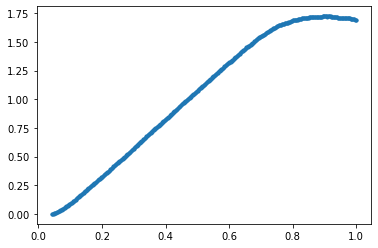

In [55]:
plt.plot(train_a11, train_p1, '.')

## Define model

reshape because the netwok expects an input of shape [number_of_samples_to_predict, input_shape], we only have one sample so [1,500]

In [62]:
train_a11 = train_a11.reshape(1,500)
train_p1 = train_p1.reshape(1,500)

In [78]:
Input = keras.layers.Input(shape=(500,))
x = keras.layers.Dense(50, activation='relu')(Input)
output = keras.layers.Dense(500, activation='relu')(x)
model = Model(inputs=Input, outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(train_a11, train_p1, epochs=300,batch_size=1, verbose=2)

Epoch 1/300
1/1 - 0s - loss: 1.2356 - accuracy: 0.0000e+00 - 237ms/epoch - 237ms/step
Epoch 2/300
1/1 - 0s - loss: 1.1706 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 3/300
1/1 - 0s - loss: 1.1065 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 4/300
1/1 - 0s - loss: 1.0456 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 5/300
1/1 - 0s - loss: 0.9888 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 6/300
1/1 - 0s - loss: 0.9368 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 7/300
1/1 - 0s - loss: 0.8916 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 8/300
1/1 - 0s - loss: 0.8539 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 9/300
1/1 - 0s - loss: 0.8227 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 10/300
1/1 - 0s - loss: 0.7968 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 11/300
1/1 - 0s - loss: 0.7744 - accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 12/300
1/1 - 0s - loss: 0.7539 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 13/

In [106]:
def evaluate(model, x, y):
    loss, acc = model.evaluate(x, y, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', acc)
    predict = model.predict(train_a11)
    plt.plot(x.reshape(500), predict.reshape(500), label='prediction', linestyle='--')
    plt.plot(x.reshape(500), y.reshape(500), label='actual', linestyle='dotted')
    plt.legend()
    plt.xlabel('a1')
    plt.ylabel('p')
    plt.show()
    

Test loss: 0.5148387551307678
Test accuracy: 1.0


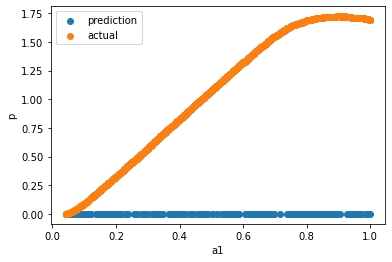

In [91]:
evaluate(model, train_a11, train_p1)

In [79]:
predict = model.predict(train_a11)

In [80]:
model.evaluate(train_a11, train_p1)

1/1 [==============================] - 0s 224ms/step - loss: 0.5148 - accuracy: 1.0000


[0.5148387551307678, 1.0]

Text(0, 0.5, 'p')

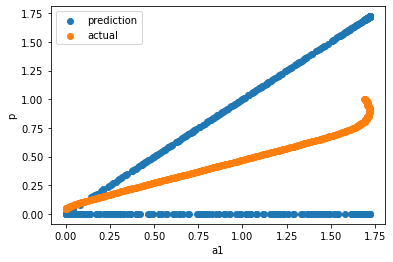

In [85]:
plt.scatter(train_p1.reshape(500), predict.reshape(500), label='prediction')
plt.scatter(train_p1.reshape(500), train_a11.reshape(500), label='actual')
plt.legend()
plt.xlabel('a1')
plt.ylabel('p')

In [94]:
Input = keras.layers.Input(shape=(500,))
x = keras.layers.Dense(500, activation='relu')(Input)
output = keras.layers.Dense(500)(x)
model = Model(inputs=Input, outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(train_a11, train_p1, epochs=300,batch_size=1, verbose=2)

Epoch 1/300
1/1 - 0s - loss: 1.6487 - accuracy: 0.0000e+00 - 229ms/epoch - 229ms/step
Epoch 2/300
1/1 - 0s - loss: 1.1857 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 3/300
1/1 - 0s - loss: 0.8657 - accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 4/300
1/1 - 0s - loss: 0.6134 - accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 5/300
1/1 - 0s - loss: 0.4286 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 6/300
1/1 - 0s - loss: 0.3149 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 7/300
1/1 - 0s - loss: 0.2479 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 8/300
1/1 - 0s - loss: 0.1953 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 9/300
1/1 - 0s - loss: 0.1436 - accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 10/300
1/1 - 0s - loss: 0.0966 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 11/300
1/1 - 0s - loss: 0.0651 - accuracy: 0.0000e+00 - 3ms/epoch - 3ms/step
Epoch 12/300
1/1 - 0s - loss: 0.0518 - accuracy: 0.0000e+00 - 2ms/epoch - 2ms/step
Epoch 13/

Test loss: 1.4478674674662552e-14
Test accuracy: 1.0


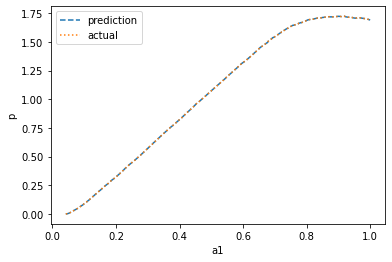

In [107]:
evaluate(model, train_a11, train_p1)

### OLD code

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_dim=1, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy','mse'])
history = model.fit(train_a11, train_p1,
                    epochs=100, batch_size=10, shuffle=True, verbose=2)

Epoch 1/100
50/50 - 0s - loss: 0.2969 - accuracy: 0.0020 - mse: 0.2969 - 338ms/epoch - 7ms/step
Epoch 2/100
50/50 - 0s - loss: 0.0575 - accuracy: 0.0040 - mse: 0.0575 - 34ms/epoch - 671us/step
Epoch 3/100
50/50 - 0s - loss: 0.0204 - accuracy: 0.0040 - mse: 0.0204 - 38ms/epoch - 769us/step
Epoch 4/100
50/50 - 0s - loss: 0.0150 - accuracy: 0.0040 - mse: 0.0150 - 39ms/epoch - 772us/step
Epoch 5/100
50/50 - 0s - loss: 0.0090 - accuracy: 0.0040 - mse: 0.0090 - 38ms/epoch - 750us/step
Epoch 6/100
50/50 - 0s - loss: 0.0048 - accuracy: 0.0040 - mse: 0.0048 - 41ms/epoch - 812us/step
Epoch 7/100
50/50 - 0s - loss: 0.0027 - accuracy: 0.0040 - mse: 0.0027 - 35ms/epoch - 694us/step
Epoch 8/100
50/50 - 0s - loss: 0.0017 - accuracy: 0.0040 - mse: 0.0017 - 38ms/epoch - 757us/step
Epoch 9/100
50/50 - 0s - loss: 0.0013 - accuracy: 0.0040 - mse: 0.0013 - 44ms/epoch - 882us/step
Epoch 10/100
50/50 - 0s - loss: 0.0011 - accuracy: 0.0040 - mse: 0.0011 - 36ms/epoch - 715us/step
Epoch 11/100
50/50 - 0s - loss

In [ ]:
def evaluate(model):
    #
    plt.plot(history.history['loss'])
    plt.title('loss')
    plt.xlabel('epoches')
    plt.ylabel('loss')
    plt.show()
    #
    plt.plot(history.history['accuracy'])
    plt.title('Accuracy')
    plt.xlabel('epoches')
    plt.ylabel('accuracy')
    plt.show()
    #
    plt.plot(history.history['mse'])
    plt.title('MSE')
    plt.xlabel('epoches')
    plt.ylabel('mse')
    plt.show()
    # 
    test_p_pred = model.predict(train_a11)
    # de-preprocess
    test_p_pred = scale_p.inverse_transform(test_p_pred)
    a11 = scale_a.inverse_transform(train_a11)
    p1 = scale_p.inverse_transform(train_p1)
    # 
    plt.plot(a11, p1, label='original data')
    plt.plot(a11, test_p_pred, label='predicted data')
    plt.legend()
    plt.title(f'predicted vs original data for q = {train_q1} and xeff = {train_xeff1}')
    plt.xlabel('a1')
    plt.ylabel('p')


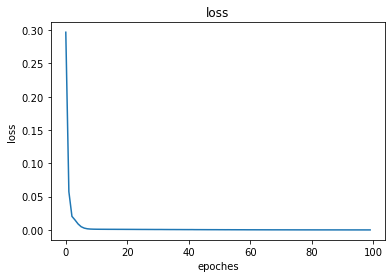

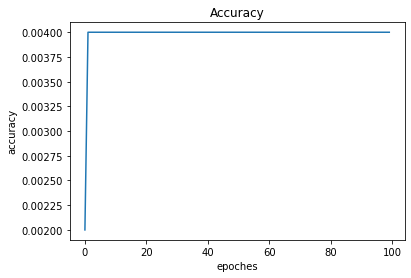

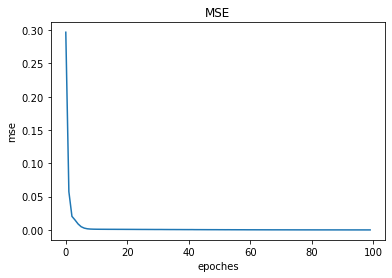

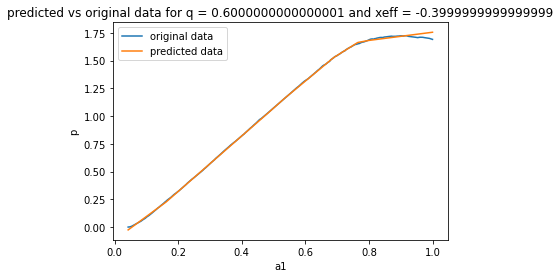

In [ ]:
evaluate(model)

In [ ]:
train_a100 = train_a11[:100]
train_p100 = train_p1[:100]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_dim=1, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy','mse'])
history = model.fit(train_a100, train_p100,
                    epochs=100, batch_size=10, shuffle=True, verbose=2)

Epoch 1/100
10/10 - 1s - loss: 0.0202 - accuracy: 0.0100 - mse: 0.0202 - 580ms/epoch - 58ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0153 - accuracy: 0.0100 - mse: 0.0153 - 10ms/epoch - 1ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0121 - accuracy: 0.0100 - mse: 0.0121 - 12ms/epoch - 1ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0100 - accuracy: 0.0100 - mse: 0.0100 - 13ms/epoch - 1ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0088 - accuracy: 0.0100 - mse: 0.0088 - 15ms/epoch - 1ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0077 - accuracy: 0.0100 - mse: 0.0077 - 12ms/epoch - 1ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0069 - accuracy: 0.0100 - mse: 0.0069 - 12ms/epoch - 1ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0063 - accuracy: 0.0100 - mse: 0.0063 - 14ms/epoch - 1ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0058 - accuracy: 0.0100 - mse: 0.0058 - 14ms/epoch - 1ms/step
Epoch 10/100
10/10 - 0s - loss: 0.0055 - accuracy: 0.0100 - mse: 0.0055 - 13ms/epoch - 1ms/step
Epoch 11/100
10/10 - 0s - loss: 0.0052 - accura

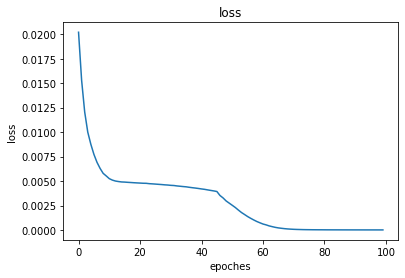

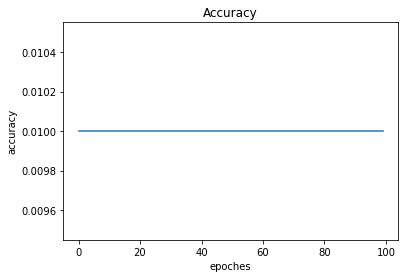

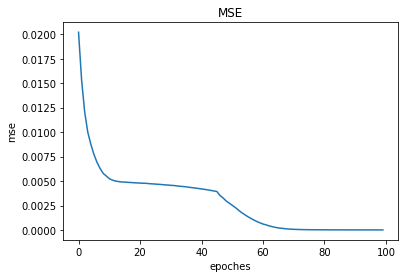

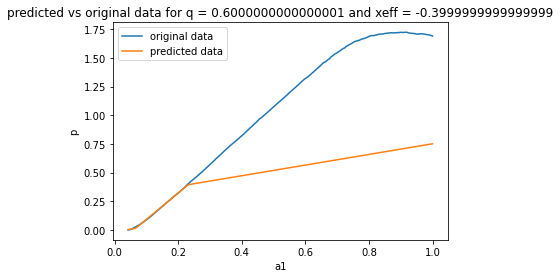

In [ ]:
evaluate(model)

In [ ]:
train_a250 = train_a11[:250]
train_p250 = train_p1[:250]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_dim=1, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy','mse'])
history = model.fit(train_a250, train_p250,
                    epochs=100, batch_size=10, shuffle=True, verbose=2)

Epoch 1/100
25/25 - 0s - loss: 0.1253 - accuracy: 0.0040 - mse: 0.1253 - 445ms/epoch - 18ms/step
Epoch 2/100
25/25 - 0s - loss: 0.0669 - accuracy: 0.0040 - mse: 0.0669 - 18ms/epoch - 715us/step
Epoch 3/100
25/25 - 0s - loss: 0.0357 - accuracy: 0.0040 - mse: 0.0357 - 24ms/epoch - 954us/step
Epoch 4/100
25/25 - 0s - loss: 0.0213 - accuracy: 0.0040 - mse: 0.0213 - 31ms/epoch - 1ms/step
Epoch 5/100
25/25 - 0s - loss: 0.0159 - accuracy: 0.0040 - mse: 0.0159 - 23ms/epoch - 915us/step
Epoch 6/100
25/25 - 0s - loss: 0.0137 - accuracy: 0.0040 - mse: 0.0137 - 25ms/epoch - 1ms/step
Epoch 7/100
25/25 - 0s - loss: 0.0122 - accuracy: 0.0040 - mse: 0.0122 - 51ms/epoch - 2ms/step
Epoch 8/100
25/25 - 0s - loss: 0.0110 - accuracy: 0.0040 - mse: 0.0110 - 55ms/epoch - 2ms/step
Epoch 9/100
25/25 - 0s - loss: 0.0098 - accuracy: 0.0040 - mse: 0.0098 - 41ms/epoch - 2ms/step
Epoch 10/100
25/25 - 0s - loss: 0.0087 - accuracy: 0.0040 - mse: 0.0087 - 29ms/epoch - 1ms/step
Epoch 11/100
25/25 - 0s - loss: 0.0076 - 

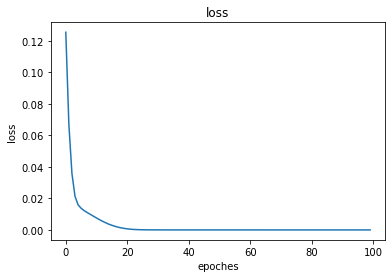

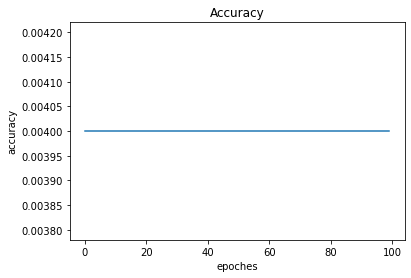

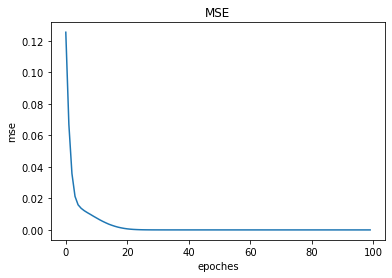

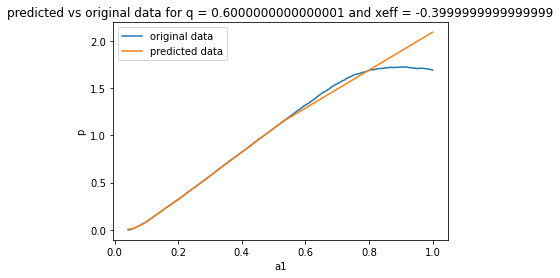

In [ ]:
evaluate(model)